## Discretizing functions with finite elements

As we saw in class, we can discretize a function inside of an element by 

$u^e(x) = \sum N_i^e(x)u_i^e$

Or the derivative of the function by 

$\frac{du^e(x)}{dx} = \sum \frac{dN_i^e(x)}{dx} u_i^e$

And this is true whether we have linear shape functions, quadratic shape functions, etc... 

We also saw in class that the shape functions may not be easily defined in the physical space $x$, but rather, it is easier to consider a fixed domain $\xi$ and define the basis functions over that domain. In turn, a map between the $x$ coordinates and the $\xi$ coordinates is needed. The isoparametric map is a special map that uses the shape functions themselves to describe the relationship between $\xi$ and $x$. 

In this notebook we define the quadratic shape functions for the domain $\xi\in[-1,1]$. The shape functions used are obtained with Lagrange polynomials so as to satisfy the interpolation property and the completeness property. Other shape functions could be used. 
 

In [1]:
import numpy as np
import sympy as sp
import matplotlib
import random
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
n_ele = 3
n_nod = 7
elements = np.array([[0,1,2],[2,3,4],[4,5,6]])
node_X = np.linspace(0,2,7)
node_u = np.random.rand(7)

In [5]:
## Define shape functions in the parent domain 
def N1(xi):
    xi1 = -1
    xi2 = 0
    xi3 = +1
    return (xi-xi2)*(xi-xi3)/((xi1-xi2)*(xi1-xi3))

def N2(xi):
    xi1 = -1
    xi2 = 0
    xi3 = +1
    return (xi-xi1)*(xi-xi3)/((xi2-xi1)*(xi2-xi3))

def N3(xi):
    xi1 = -1
    xi2 = 0
    xi3 = +1
    return (xi-xi1)*(xi-xi2)/((xi3-xi1)*(xi3-xi2))

## Define derivatives of shape functions in parent domain 
def dN1dxi(xi):
    xi1 = -1
    xi2 = 0
    xi3 = +1
    return ((xi-xi2)+(xi-xi3))/((xi1-xi2)*(xi1-xi3))

def dN2dxi(xi):
    xi1 = -1
    xi2 = 0
    xi3 = +1
    return ((xi-xi1)+(xi-xi3))/((xi2-xi1)*(xi2-xi3))

def dN3dxi(xi):
    xi1 = -1
    xi2 = 0
    xi3 = +1
    return ((xi-xi1)+(xi-xi2))/((xi3-xi1)*(xi3-xi2))


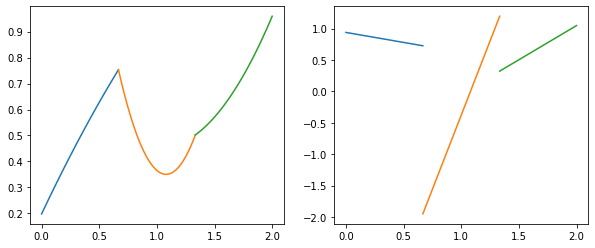

In [6]:
## plot a function over the domain by plotting in each element 

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,4))

# Loop over elements 
for i in range(n_ele):
    
    # Read the nodes that make up this element 'i'
    n1 = elements[i,0] 
    n2 = elements[i,1]
    n3 = elements[i,2]
    
    # Beginning and end 'x' coordinates of this element 
    x1e = node_X[n1]
    x2e = node_X[n2]
    x3e = node_X[n3]
    
    # Get the nodal values of the function 'u'
    u1e = node_u[n1]
    u2e = node_u[n2]
    u3e = node_u[n3]
    
    # Eval the shape function evaluation for multiple xi in this element
    xi_vec = np.linspace(-1,1,50)
    
    # use the shape functions to interpolate from the nodal u values to all the 'xi'
    u_vec = N1(xi_vec)*u1e + N2(xi_vec)*u2e +  N3(xi_vec)*u3e
    
    ## ISOPARAMETRIC MAP
    x_vec = N1(xi_vec)*x1e + N2(xi_vec)*x2e + N3(xi_vec)*x3e
    
    ## JACOABIAN OF THE ISOPARAMETRIC MAP
    dxdxi = dN1dxi(xi_vec)*x1e + dN2dxi(xi_vec)*x2e + dN3dxi(xi_vec)*x3e
    # note, it is a vector of scalars, the inverse of the Jacobian in this case is just 1/Jac 
    # when we do 2D we will need to take the inverse of the jacobian matrix 
    dxidx = 1./dxdxi
    
    # note, we can take derivatives with respect to xi easily since shape functions are in terms of xi 
    dudxi = dN1dxi(xi_vec)*u1e + dN2dxi(xi_vec)*u2e + dN3dxi(xi_vec)*u3e
    # need to use the chain rule and thus the inverse jacobian to get gradients with respect to x
    dudx_vec = dudxi*dxidx
    
    # plot function u
    ax1.plot(x_vec,u_vec)
    
    # plot the gradient
    ax2.plot(x_vec,dudx_vec)
    